# 衡量投资质量的基本指标

* 收益率

* 风险

* 最大回撤

本节内容对应《量化投资以python为工具》电子书的265-273页（同时也是书上的247-255页）

In [3]:
from gm.api import *
import pandas as pd

set_token("eea4b28a3ceb7048603d388bb777ebc67de47385")

## 收益率

* 掘金数据的处理

* 单期与多期收益率

In [4]:
#000413 东旭光电，000063 中兴通讯，002007 华兰生物，000001 平安银行，000002 万科A
stock_n = history(symbol='SZSE.000413,SZSE.000063,SZSE.002007,SZSE.000001,SZSE.000002', frequency='1d', start_time='2020-07-28',  end_time='2021-07-30', fields='symbol,open, close, low, high, eob', adjust=ADJUST_PREV, df= True)
stock_n

,symbol,open,close,low,high,eob
0,SZSE.000002,24.4712,24.5077,24.2797,24.6263,2020-07-28 00:00:00+08:00
1,SZSE.000063,38.1755,37.9678,37.6512,38.3832,2020-07-28 00:00:00+08:00
2,SZSE.002007,57.2363,55.6690,53.7446,57.2363,2020-07-28 00:00:00+08:00
3,SZSE.000001,13.2359,13.2359,13.0772,13.3252,2020-07-28 00:00:00+08:00
4,SZSE.000413,2.7600,2.8000,2.7500,2.8400,2020-07-28 00:00:00+08:00
...,...,...,...,...,...,...
1229,SZSE.000002,19.2828,19.5381,19.0086,19.5760,2021-07-30 00:00:00+08:00
1230,SZSE.000063,37.0447,38.5862,36.8955,38.9143,2021-07-30 00:00:00+08:00
1231,SZSE.002007,36.5400,36.7900,35.7000,37.2400,2021-07-30 00:00:00+08:00
1232,SZSE.000001,17.9200,17.6900,17.2400,18.0500,2021-07-30 00:00:00+08:00


In [7]:
str(stock_n.eob[0].date())

'2020-07-28'

In [8]:
def time_str(x):
    return str(x.date())

stock_n.eob=stock_n.eob.apply(time_str)

In [10]:
stock_n[stock_n.eob<"2021-07-30"]

,symbol,open,close,low,high,eob
0,SZSE.000002,24.4712,24.5077,24.2797,24.6263,2020-07-28
1,SZSE.000063,38.1755,37.9678,37.6512,38.3832,2020-07-28
2,SZSE.002007,57.2363,55.6690,53.7446,57.2363,2020-07-28
3,SZSE.000001,13.2359,13.2359,13.0772,13.3252,2020-07-28
4,SZSE.000413,2.7600,2.8000,2.7500,2.8400,2020-07-28
...,...,...,...,...,...,...
1224,SZSE.000002,19.5760,19.4814,19.1126,19.7178,2021-07-29
1225,SZSE.000063,37.9099,37.3431,36.8458,38.0690,2021-07-29
1226,SZSE.002007,37.1500,36.7900,36.4100,37.4400,2021-07-29
1227,SZSE.000001,17.9100,17.9600,17.7800,18.2400,2021-07-29


In [14]:
stock_n[["symbol","close","eob"]]

,symbol,close,eob
0,SZSE.000002,24.5077,2020-07-28
1,SZSE.000063,37.9678,2020-07-28
2,SZSE.002007,55.6690,2020-07-28
3,SZSE.000001,13.2359,2020-07-28
4,SZSE.000413,2.8000,2020-07-28
...,...,...,...
1229,SZSE.000002,19.5381,2021-07-30
1230,SZSE.000063,38.5862,2021-07-30
1231,SZSE.002007,36.7900,2021-07-30
1232,SZSE.000001,17.6900,2021-07-30


In [19]:
pd.pivot_table(stock_n,index=["eob"],columns=["symbol"],values=["close"]).close

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2020-07-28,13.2359,24.5077,37.9678,2.80,55.6690
2020-07-29,13.4344,24.7266,39.1153,2.84,59.3492
2020-07-30,13.2657,24.5168,38.4921,2.79,60.4899
2020-07-31,13.2359,24.4803,38.7493,2.80,64.4082
2020-08-03,13.4840,24.8816,39.0757,2.86,70.8460
...,...,...,...,...,...
2021-07-26,18.8000,20.2001,35.9508,2.08,36.4600
2021-07-27,17.7600,19.0653,36.5674,2.08,35.8900
2021-07-28,17.7500,19.3774,37.0845,1.96,36.9000


In [20]:
stock_close=pd.pivot_table(stock_n,index=["eob"],columns=["symbol"],values=["close"]).close

In [21]:
stock_close

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2020-07-28,13.2359,24.5077,37.9678,2.80,55.6690
2020-07-29,13.4344,24.7266,39.1153,2.84,59.3492
2020-07-30,13.2657,24.5168,38.4921,2.79,60.4899
2020-07-31,13.2359,24.4803,38.7493,2.80,64.4082
2020-08-03,13.4840,24.8816,39.0757,2.86,70.8460
...,...,...,...,...,...
2021-07-26,18.8000,20.2001,35.9508,2.08,36.4600
2021-07-27,17.7600,19.0653,36.5674,2.08,35.8900
2021-07-28,17.7500,19.3774,37.0845,1.96,36.9000


## classwork1

* 请计算'sz000413'的第一期收益率（2020-07-28收盘价买入，通过2020-07-29收盘价看收益）

* 请计算stockset中所有股票所有期的单期收益率，并作图(shift函数的使用)

* 请计算'sz000413'的2020-07-28收盘价买入，通过2020-07-30卖出的收益率

* 请计算所有股票所有天的二期收益率

In [35]:
(stock_close["SZSE.000413"]["2020-07-30"]-stock_close["SZSE.000413"]["2020-07-28"])/stock_close["SZSE.000413"]["2020-07-28"]

-0.003571425226269879

In [27]:
stock_close.shift(1)

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2020-07-28,NaN,NaN,NaN,NaN,NaN
2020-07-29,13.2359,24.5077,37.9678,2.80,55.6690
2020-07-30,13.4344,24.7266,39.1153,2.84,59.3492
2020-07-31,13.2657,24.5168,38.4921,2.79,60.4899
2020-08-03,13.2359,24.4803,38.7493,2.80,64.4082
...,...,...,...,...,...
2021-07-26,20.1000,21.8551,36.1696,2.10,38.1200
2021-07-27,18.8000,20.2001,35.9508,2.08,36.4600
2021-07-28,17.7600,19.0653,36.5674,2.08,35.8900


In [32]:
r1=((stock_close-stock_close.shift(1))/stock_close.shift(1)).loc["2020-07-29":]

In [37]:
r2=((stock_close-stock_close.shift(2))/stock_close.shift(2)).loc["2020-07-30":]
r2

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2020-07-30,0.0022,0.0004,0.0138,-0.0036,0.0866
2020-07-31,-0.0148,-0.0100,-0.0094,-0.0141,0.0852
2020-08-03,0.0165,0.0149,0.0152,0.0251,0.1712
2020-08-04,0.0525,0.0335,-0.0074,0.0321,0.0547
2020-08-05,0.0125,0.0026,-0.0091,0.0315,-0.0175
...,...,...,...,...,...
2021-07-26,-0.0775,-0.0797,-0.0267,-0.0326,-0.0627
2021-07-27,-0.1164,-0.1277,0.0110,-0.0095,-0.0585
2021-07-28,-0.0559,-0.0407,0.0315,-0.0577,0.0121


<AxesSubplot:xlabel='eob'>

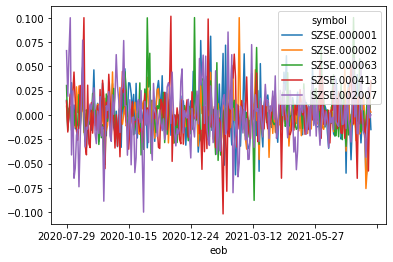

In [34]:
r1.plot()

In [44]:
r1=(stock_close-stock_close.shift(1))/stock_close.shift(1)
r1

symbol,SZSE.000001,SZSE.000002,SZSE.000063,SZSE.000413,SZSE.002007
eob,,,,,
2020-07-28,NaN,NaN,NaN,NaN,NaN
2020-07-29,0.0150,0.0089,0.0302,0.0143,0.0661
2020-07-30,-0.0126,-0.0085,-0.0159,-0.0176,0.0192
2020-07-31,-0.0022,-0.0015,0.0067,0.0036,0.0648
2020-08-03,0.0187,0.0164,0.0084,0.0214,0.1000
...,...,...,...,...,...
2021-07-26,-0.0647,-0.0757,-0.0060,-0.0095,-0.0435
2021-07-27,-0.0553,-0.0562,0.0172,0.0000,-0.0156
2021-07-28,-0.0006,0.0164,0.0141,-0.0577,0.0281


<AxesSubplot:xlabel='eob'>

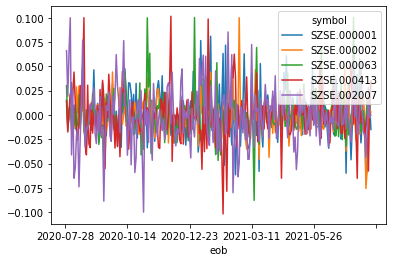

In [45]:
r1.plot()

## 多期与单期的关系

### 年化收益率

In [44]:
0.008+0.008

0.016

In [43]:
1*(1+0.008)*(1+0.008)-1

0.016064000000000078

In [45]:
0.016064000000000078/2

0.008032000000000039

In [46]:
(0.016064000000000078+1)**0.5-1

0.008000000000000007

In [47]:
(0.0076/9)*365

0.30822222222222223

In [48]:
(0.0076+1)**(365/7.0)-1

0.48406866689184724

### classwork2

* 选择输出000413 2021-01-08 这天的二期收益，比较其2021-01-07与2021-01-08单期收益之和的关系

* 请通过单期收益率计算严格的二期收益率

* 计算 '000413的2021-01-11这天的七日收益率，并基于此求七日年化收益率

In [65]:
((stock_close["SZSE.000413"]["2021-01-11"]-stock_close["SZSE.000413"]["2021-01-05"]))/stock_close["SZSE.000413"]["2021-01-05"]

-0.09842519832859187

In [68]:
(-0.09842519832859187/7)*250

-3.515185654592567

In [72]:
(1-0.09842519832859187)**(250/7.)-1

-0.9752873010373428

In [53]:
r2["SZSE.000413"]["2021-01-08"]

-0.04799995422363281

In [55]:
(1+r1["SZSE.000413"]["2021-01-07"])*(1+r1["SZSE.000413"]["2021-01-08"])-1

-0.0479999542236329

In [63]:
-0.04799995422363281*250

-10.999988555908203

In [60]:
(1+0.04799995422363281)**250-1

123115.40325744804

# 资产风险的测度

* 此部分可以参考《量化投资以python为工具》电子书的284页（同时也是书上的266页）


### 风险——方差

### 最大回撤

就是从任一高点到其后续最低点的下跌幅度的最大值

https://zhuanlan.zhihu.com/p/91249594

### 夏普率

夏普率(sharpe ratio): 衡量策略相对于无风险组合的表现，是策略所获得风险溢价的度量——即如果策略额外承担一单位的风险，可以获得多少单位的收益作为补偿

假设国债利率是3%（既无风险回报率3%），投资组合预期回报利率是13%、标准偏差是5%，超出无风险投资回报为=13%-3%=10%，夏普比率=10%/5%=2，意味着投资风险每增长1单位，可产生超额收益2单位

https://wiki.mbalib.com/wiki/%E5%A4%8F%E6%99%AE%E6%8C%87%E6%95%B0

In [73]:
a1=pd.Series([1,4,3])

In [74]:
a1

0    1
1    4
2    3
dtype: int64

In [75]:
((a1-a1.mean())**2).sum()

4.666666666666667

In [78]:
a1.var()*2

4.666666666666667

In [48]:
a1.var()*2

4.666666666666667

In [56]:
r1.loc["2020-07-29":]["SZSE.000413"].var()

0.0006466586875528915

## classwork2

* 计算SZSE.000063的全部时间的风险

* 计算SZSE.000063的夏普率，假设无风险回报率3%

* 计算SZSE.000063的最大回撤

In [89]:
r1["SZSE.000063"].std()

0.02357763122555496

In [87]:
(((r1["SZSE.000063"]["2021-07-30"]-r1["SZSE.000063"]["2020-07-29"])/r1["SZSE.000063"]["2020-07-29"])-0.03)/r1["SZSE.000063"].std()

3.0283004702328493

In [93]:
r1["SZSE.000063"].max()

0.10009822981183504

In [99]:
hc=[]
for i in r1.index:
    hc.append(r1["SZSE.000063"][:i].max()-r1["SZSE.000063"][i])
    
max(hc)

0.1880103149991616

In [95]:
r1["SZSE.000063"][:"2021-07-30"]

eob
2020-07-29    0.0302
2020-07-30   -0.0159
2020-07-31    0.0067
2020-08-03    0.0084
2020-08-04   -0.0157
               ...  
2021-07-26   -0.0060
2021-07-27    0.0172
2021-07-28    0.0141
2021-07-29    0.0070
2021-07-30    0.0333
Name: SZSE.000063, Length: 246, dtype: float64

In [94]:
r1["SZSE.000063"]["2021-07-30"].max()-r1["SZSE.000063"]["2021-07-30"]

0.06680929208029299

In [90]:
for i in r1["SZSE.000063"]:
    

eob
2020-07-29    0.0302
2020-07-30   -0.0159
2020-07-31    0.0067
2020-08-03    0.0084
2020-08-04   -0.0157
               ...  
2021-07-26   -0.0060
2021-07-27    0.0172
2021-07-28    0.0141
2021-07-29    0.0070
2021-07-30    0.0333
Name: SZSE.000063, Length: 246, dtype: float64

# 第一个策略的编写与运行

https://www.myquant.cn/docs/python/python_basic

* 定时任务

* 初始化函数 ini

* 定时运行函数 elgo

不同的函数运行次数是不同的！

init 函数最开始运行一次，其他函数运行次数由相关函数决定

In [ ]:
# coding=utf-8
from __future__ import print_function, absolute_import
from gm.api import *
def init(context):
    # 每天14:50 定时执行algo任务,
    # algo执行定时任务函数，只能传context参数
    # date_rule执行频率，目前暂时支持1d、1w、1m，其中1w、1m仅用于回测，实时模式1d以上的频率，需要在algo判断日期
    # time_rule执行时间， 注意多个定时任务设置同一个时间点，前面的定时任务会被后面的覆盖
    schedule(schedule_func=algo, date_rule='1d', time_rule='14:50:00')
def algo(context):
    # 以市价购买200股浦发银行股票， price在市价类型不生效
    order_volume(symbol='SHSE.600000', volume=200, side=OrderSide_Buy,
                 order_type=OrderType_Market, position_effect=PositionEffect_Open, price=0)
# 查看最终的回测结果
def on_backtest_finished(context, indicator):
    print(indicator)
if __name__ == '__main__':
    '''
        strategy_id策略ID, 由系统生成
        filename文件名, 请与本文件名保持一致
        mode运行模式, 实时模式:MODE_LIVE回测模式:MODE_BACKTEST
        token绑定计算机的ID, 可在系统设置-密钥管理中生成
        backtest_start_time回测开始时间
        backtest_end_time回测结束时间
        backtest_adjust股票复权方式, 不复权:ADJUST_NONE前复权:ADJUST_PREV后复权:ADJUST_POST
        backtest_initial_cash回测初始资金
        backtest_commission_ratio回测佣金比例
        backtest_slippage_ratio回测滑点比例
    '''
    run(strategy_id='strategy_id',
        filename='main.py',
        mode=MODE_BACKTEST,
        token='token_id',
        backtest_start_time='2020-11-01 08:00:00',
        backtest_end_time='2020-11-10 16:00:00',
        backtest_adjust=ADJUST_PREV,
        backtest_initial_cash=10000000,
        backtest_commission_ratio=0.0001,
        backtest_slippage_ratio=0.0001)

## 掘金平台下的股票代码


上交所 SHSE

深交所 SZSE

## 不同的交易函数


order_volume - 按指定量委托
order_value - 按指定价值委托
order_percent - 按总资产指定比例委托
order_target_volume - 调仓到目标持仓量
order_target_value - 调仓到目标持仓额
order_target_percent - 调仓到目标持仓比例（总资产的比例）
order_batch - 批量委托接口
order_cancel - 撤销委托
order_cancel_all - 撤销所有委托
order_close_all - 平当前所有可平持仓


## classwork1

* 请找到贵州茅台股票的代码，并在2012年第一个交易日开始每天买入100股，直至钱花光，看20200101的收益

* 并在2012年第一个交易日开始每天买入100000金额的贵州茅台股票，看20200101的收益

* 请找到贵州茅台股票的代码，并在2012年第一个交易日开始保持仓位500股贵州茅台，直至钱花光，看20200101的收益

* 一开始就买入100%资金的股票